# Mary McDonagh
# Programming for Data Analysis
# Analysis of a real world phenomenom

### Table of Contents
- 1.0 Investigation
- 2.0 Assignment Questions:
- 2.1 Choose a real world phenomenon to collect at least one-hundred data points across at least four different variables.
- 2.2 Investigate the types of variables involved, their likely distributions and their relationships with each other.
- 2.3 Sumulate a data set matching their properties as closely as possible.
- 2.4 Detail my research and output the simulation using a Jupyter notebook. 
- 3.0 Summary
- 4.0 References

## 1.0 Investigation
I have chosen the example reviewing sample census data which I have made up for the purpose of this project. The four variables I will review are age, gender, nationality and work status.

## 2.0 Assignment Questions

### 2.1: Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables

### Real World Phenomenom
Analysing the world's econometric factors while highlighting the associations between the world GDP per capita, life expectancy, population, birth rate and neo natal mortality rate.
This project is based on a pre existing dataset taken from the world databank indicators portal. The datset is called nations.csv.

#### Overview of the existing Dataset.

Five attributes have been taken into consideration:
- gdp_percap
- life_expect
- population
- birth_rate
- Neo natal Mortal Rate.

To begin we will study the existing dataset to understand the different attributes, their relations with each other and the distribution they follow. Using these observations we will form an algorithym for a manual data sythesis.

In [14]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [4]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\sam2\\real world phenomenon'

In [5]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'nations.csv',
 'obsolete',
 'real world phenomenom.ipynb',
 'Updated project']

In [15]:
# Reading the csv file with the pre-defined data
# Sort the year into a list and print the output
predefined_data = pd.read_csv("nations.csv")
print(list(predefined_data))
year=sorted(predefined_data['year'].tolist())
print(Counter(year))
print(" Number of Rows by Columns", predefined_data.shape)

['iso2c', 'iso3c', 'country', 'year', 'gdp_percap', 'life_expect', 'population', 'birth_rate', 'neonat_mortal_rate', 'region', 'income']
Counter({1990: 211, 1991: 211, 1992: 211, 1993: 211, 1994: 211, 1995: 211, 1996: 211, 1997: 211, 1998: 211, 1999: 211, 2000: 211, 2001: 211, 2002: 211, 2003: 211, 2004: 211, 2005: 211, 2006: 211, 2007: 211, 2008: 211, 2009: 211, 2010: 211, 2011: 211, 2012: 211, 2013: 211, 2014: 211})
 Number of Rows by Columns (5275, 11)


In [13]:
df_nations = pd.read_csv('https://raw.githubusercontent.com/shakti230/real-world-phenomenon/master/nations.csv')
df_nations.head()

,iso2c,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
0,AD,AND,Andorra,1996,NaN,NaN,64291.0,10.9,2.8,Europe & Central Asia,High income
1,AD,AND,Andorra,1994,NaN,NaN,62707.0,10.9,3.2,Europe & Central Asia,High income
2,AD,AND,Andorra,2003,NaN,NaN,74783.0,10.3,2.0,Europe & Central Asia,High income
3,AD,AND,Andorra,1990,NaN,NaN,54511.0,11.9,4.3,Europe & Central Asia,High income
4,AD,AND,Andorra,2009,NaN,NaN,85474.0,9.9,1.7,Europe & Central Asia,High income


### 2.2 Investigate the types of variables involved, their likely distributions and their relationships with each other.


#### Subsetting values
The dataset has 5275 rows of data gathered over a period of 24 years starting from 1990 to 2014. Each year has 211 data point. We subset the data where the year is equal to 2000. I will use this as a reference for the project. The rows containing NA values have been removed and the columns which are not necessary are not included.


In [6]:
# Extracting the data from the year 2000
# predefined_data = predefined_data[predefined_data['Year'] == 2000]
# remove any rows containing na
# remove columns which will not be analysed in this project
predefined_data_2000=predefined_data.loc[predefined_data['year'] == 2000].dropna().drop(columns=['iso2c', 'iso3c'])
predefined_data_2000.head()

,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
34,United Arab Emirates,2000,84974.894090,74.451537,3050128.0,16.399,5.6,Middle East & North Africa,High income
80,Antigua and Barbuda,2000,15312.566500,73.397293,77648.0,20.240,9.4,Latin America & Caribbean,Upper middle income
119,Albania,2000,4045.752069,74.271537,3089027.0,16.401,11.3,Europe & Central Asia,Upper middle income
139,Armenia,2000,2313.331946,71.276585,3076098.0,13.203,15.9,Europe & Central Asia,Lower middle income
161,Angola,2000,3036.559728,45.204780,15058638.0,51.009,58.4,Sub-Saharan Africa,Lower middle income


#### Exploratory Analysis
Using the describe() function we can display the statistical facts of the data as shown below.

In [8]:
#Exploratory analysis of different variables.
predefined_data_2000.describe()

,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate
count,173.0,173.000000,173.000000,1.730000e+02,173.000000,173.000000
mean,2000.0,10873.431872,66.468042,3.420891e+07,24.497205,20.243353
std,0.0,14194.539120,10.246487,1.284700e+08,12.043846,15.205909
min,2000.0,410.975954,38.690146,1.917400e+04,7.800000,1.600000
25%,2000.0,1958.932465,59.339488,2.367550e+06,13.300000,7.000000
50%,2000.0,5785.874250,70.137195,6.949366e+06,21.859000,16.000000
75%,2000.0,12085.376020,73.748780,2.139227e+07,32.945000,32.000000
max,2000.0,86725.542030,81.076098,1.262645e+09,53.251000,60.400000


### Dataset per Column 
The code listed below is used to display the datatypes of the Columns in the data frame. The variables analysed in this project and their data types are as listed below:
- year - integer type i.e. non zero value
- gdp_percap - float i.e. decimal Value
- life_expect - float i.e. decimal Value
- population - float i.e. decimal Value
- birth_rate - float i.e. decimal Value
- neonat_mortal_rate - float i.e. decimal Value

In [17]:
# Display the data types of the columns
predefined_data_2000.dtypes

country                object
year                    int64
gdp_percap            float64
life_expect           float64
population            float64
birth_rate            float64
neonat_mortal_rate    float64
region                 object
income                 object
dtype: object

### Distribution of Data
Plotting histograms for each column of interest for this project allows me to check the distribution followed by the data in each column.

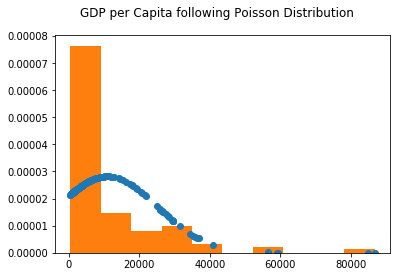

In [20]:
import scipy.stats as stats
fit = stats.norm.pdf(predefined_data_2000['gdp_percap'].tolist(), np.mean(predefined_data_2000['gdp_percap'].tolist()), np.std(predefined_data_2000['gdp_percap'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['gdp_percap'].tolist(),fit,'o')

# Draw histogram of the  data
plt.hist(predefined_data_2000['gdp_percap'].tolist(),normed=True)  
# Add a title using .suptitle to the plot
plt.suptitle("GDP per Capita following Poisson Distribution")
plt.show()   

We can identify from the plot above that the distribution is Poisson.

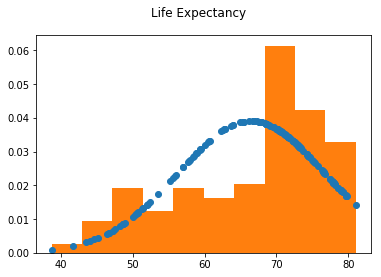

In [23]:
fit = stats.norm.pdf(predefined_data_2000['life_expect'].tolist(), np.mean(predefined_data_2000['life_expect'].tolist()), np.std(predefined_data_2000['life_expect'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['life_expect'].tolist(),fit,'o')

# Draw histogram of the data
plt.hist(predefined_data_2000['life_expect'].tolist(),normed=True)      

# Name the plot Life Expectancy as using data from this variable to plot
plt.suptitle("Life Expectancy")
plt.show()

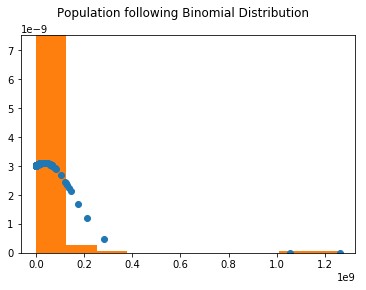

In [24]:
# predefined_data_2000['population']=predefined_data_2000.loc[:,'population'] * 1000
fit = stats.norm.pdf(predefined_data_2000['population'].tolist(), np.mean(predefined_data_2000['population'].tolist()), np.std(predefined_data_2000['population'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['population'].tolist(),fit,'o')

plt.hist(predefined_data_2000['population'].tolist(),normed=True)      
plt.suptitle("Population following Binomial Distribution")
plt.show()

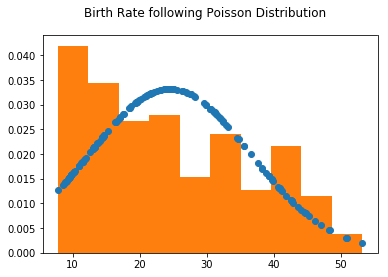

In [25]:
# predefined_data_2000['population']=predefined_data_2000.loc[:,'population'] * 1000
fit = stats.norm.pdf(predefined_data_2000['birth_rate'].tolist(), np.mean(predefined_data_2000['birth_rate'].tolist()), np.std(predefined_data_2000['birth_rate'].tolist()))  #this is a fitting indeed

plt.plot(predefined_data_2000['birth_rate'].tolist(),fit,'o')

plt.hist(predefined_data_2000['birth_rate'].tolist(),normed=True)      #use this to draw histogram of your data
plt.suptitle("Birth Rate following Poisson Distribution")
plt.show()

### 2.3 Sumulate a data set matching their properties as closely as possible.


### 2.4 Detail my research and output the simulation using a Jupyter notebook. 

### 3.0 Summary


### 4.0 References